In [3]:
from sklearn.datasets import fetch_openml
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
%matplotlib inline


In [4]:
mnist =fetch_openml("mnist_784")

In [5]:
x, y = mnist['data'] ,mnist ['target']

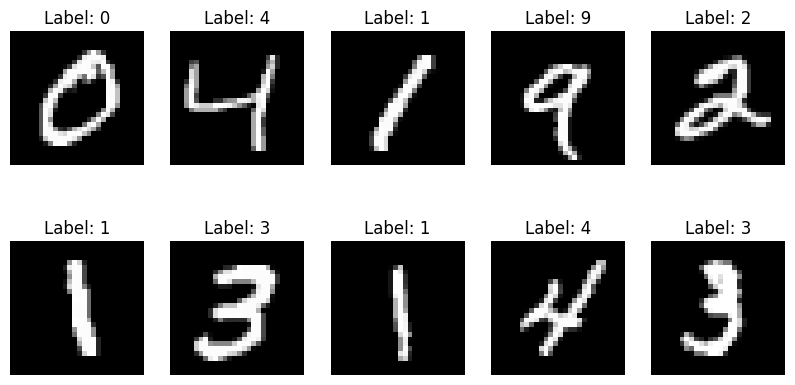

In [6]:
some_digits = x.iloc[1:11]  
some_labels = y.iloc[1:11]

# Convert to NumPy array
some_digits_array = some_digits.to_numpy()

# Plot the images
plt.figure(figsize=(10, 5))
for i in range(10):
    image = some_digits_array[i].reshape(28, 28)  # Reshape each image to 28x28
    plt.subplot(2, 5, i + 1)  # Create a subplot for each image
    plt.imshow(image, cmap='gray')  # Display the image

    plt.axis('off')  # Turn off the axis
    plt.title(f"Label: {some_labels.iloc[i]}")  # Set the title to the label
plt.show()

In [7]:
x.shape, y.shape


((70000, 784), (70000,))

In [8]:
print(x.head(10))

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0        

In [9]:

# Print the first image and its label
print("Pixel Values:")
print(x.iloc[0].values.reshape(28, 28))
print("Label:", y.iloc[0])


Pixel Values:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 

In [10]:
# Assuming x is your dataset containing 70000 data points

# Generate random indices for the dataset
indices = np.random.permutation(70000)

# Split the dataset into training and testing sets
train_indices = indices[:80001]
test_indices = indices[8001:10001]

# Select rows using iloc based on the generated indices
x_train = x.iloc[train_indices]
x_test = x.iloc[test_indices]


In [11]:
some_digits = x.iloc[1:8001]  # Note: Index 8001 is not included, so it covers 1 to 8000
# Convert to NumPy array
some_digits_array = some_digits.to_numpy()

# Check the shape of the array
print("Shape of the data array:", some_digits_array.shape)  # Should be (8000, 784)

Shape of the data array: (8000, 784)


In [12]:
y.iloc[36005]

'3'

In [13]:
y_train = y.iloc[train_indices]
y_test = y.iloc[test_indices]

In [14]:
# Train a KNN Classifier model
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
# Train a Support Vector Machine model
svm = SVC()
svm.fit(x_train, y_train)


SVC()

In [15]:
# prompt: print the result of the above models

knn_accuracy = KNN.score(x_test, y_test)
knn_predictions = KNN.predict(x_test)

svm_accuracy = svm.score(x_test, y_test)
svm_predictions = svm.predict(x_test)

print(f"KNN: {KNN.score(x_test, y_test)}")
print(f"Support Vector Machine: {svm.score(x_test, y_test)}")


KNN: 0.9825
Support Vector Machine: 0.992


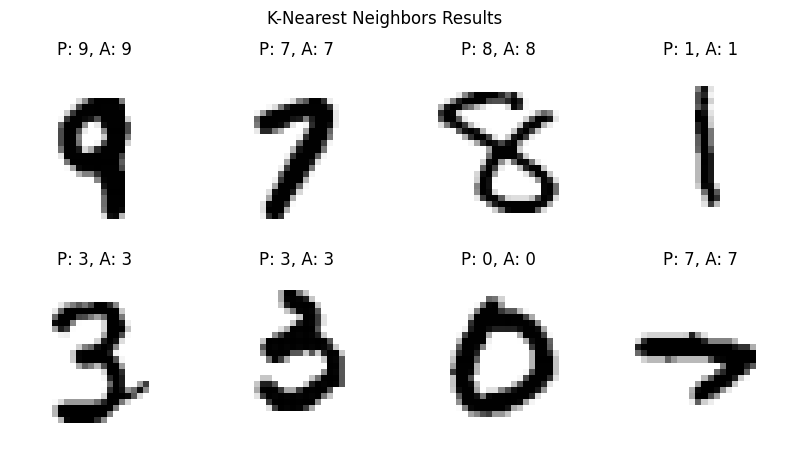

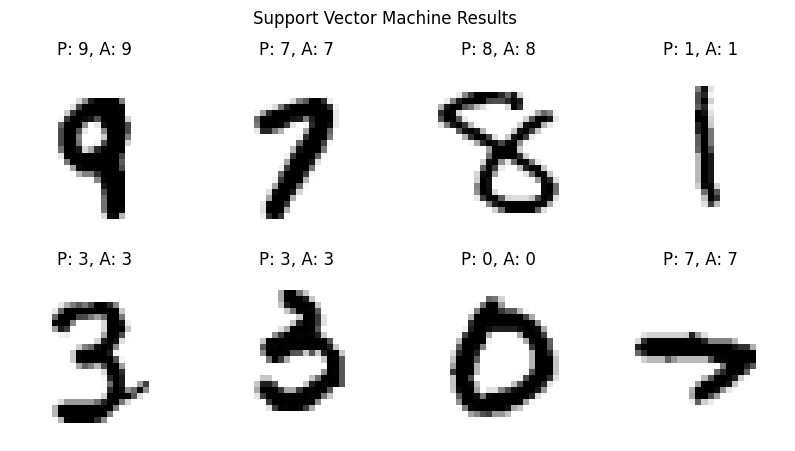

In [16]:
def plot_results(model, x_test, y_test, title):
    fig, axes = plt.subplots(2, 4, figsize=(10, 5))
    fig.suptitle(title)

    for i, ax in enumerate(axes.flat):
        some_digit = x_test.iloc[i].to_numpy().reshape(28,28)
        ax.imshow(some_digit, cmap=matplotlib.cm.binary, interpolation="nearest")
        ax.axis("off")
        predicted = model.predict(x_test.iloc[[i]])[0]
        actual = y_test.iloc[i]
        ax.set_title(f"P: {predicted}, A: {actual}")
# Plot results for K-Nearest Neighbors
plot_results(KNN, x_test, y_test, "K-Nearest Neighbors Results")

# Plot results for Support Vector Machine
plot_results(svm, x_test, y_test, "Support Vector Machine Results")

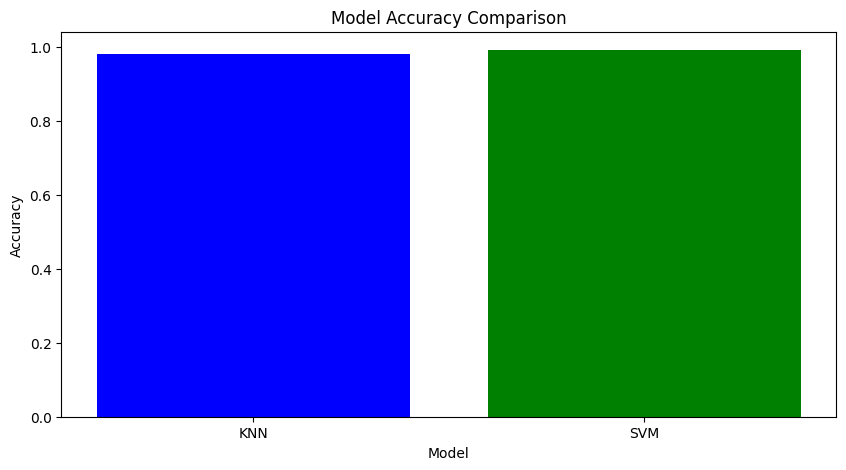

In [17]:
models = ['KNN', 'SVM']
accuracies = [ knn_accuracy, svm_accuracy]
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

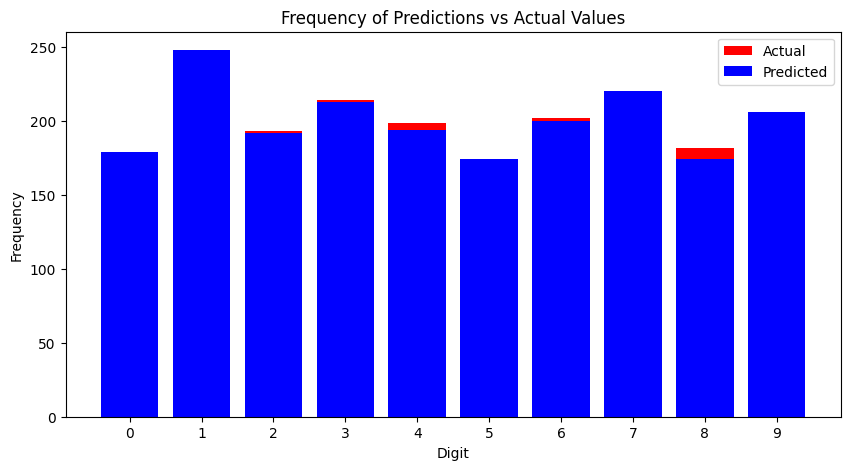

In [18]:
# Count the frequencies of each digit in the actual and predicted values
unique_actual, counts_actual = np.unique(y_test, return_counts=True)
unique_pred, counts_pred = np.unique(knn_predictions, return_counts=True)

# Plot the frequencies
plt.figure(figsize=(10, 5))
plt.bar(unique_actual, counts_actual, color='red', label='Actual')
plt.bar(unique_pred, counts_pred, color='blue', label='Predicted')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Frequency of Predictions vs Actual Values')
plt.legend()
plt.show()


In [19]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, svm_predictions, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.9919769951558658
